# Capstone - Team 18
## EDA

Installs if necessary

In [1]:
#install 
#! pip3 install pandas
#! pip3 install numpy
#! pip3 install wordcloud
#! pip3 install matplotlib
#! pip3 install regex
#! pip3 install plotly 
#! pip3 install spacy
#! pip3 install gensim
#! pip3 install nltk
#! pip3 install afinn
#! pip3 install -U scikit-learn
#! pip3 install seaborn
#! pip3 install nbformat

Imports

In [2]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import string
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
import unicodedata

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


Reading the CSV file's in

# Preprocessing the data 
For more detailed description see 03_TopicAnalysis

In [3]:
bj_r_text_eng = pd.read_csv("bj_r_text_eng.csv")
bj_r_text_eng["review"] = bj_r_text_eng["review"].str.lower()
string.punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

bj_r_text_eng['review_punct'] = bj_r_text_eng['review'].apply(lambda x: remove_punct(x))

In [4]:
# then we do tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

bj_r_text_eng['review_tokenized'] = bj_r_text_eng['review_punct'].apply(lambda x: tokenization(x))


In [5]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
bj_r_text_eng['review_nonstop'] = bj_r_text_eng['review_tokenized'].apply(lambda x: remove_stopwords(x))


In [6]:
bj_r_text_review = bj_r_text_eng['review_nonstop']
bj_r_text_review = bj_r_text_review.to_string().split(",")


Removing additional words

In [7]:
non_sense_word = ["i","always","shop","place","store","get","good","great","love","everything","like","bjs","one","lot","best","go","nice","went","people","really","need","bj","buy","dont","thing","today"]
def remove_nonsense(text):
    text = [word for word in text if word not in non_sense_word]
    return text
    
bj_r_text_eng['review_nonsense'] = bj_r_text_eng['review_nonstop'].apply(lambda x: remove_nonsense(x))


# NLP


# n-grams
We will look into bigrams, trigrams and fourgrams


In [9]:
# 2 n-grams
bigrams_series = (pd.Series(nltk.ngrams(bj_r_text_review
                       , 2)).value_counts())[:30]

# we can see that great prices, good prices and well stocked are often used together
# great palce, bulk items, everything need, long lines, friendly staff, good deals, store good, good selection, friendly, helpful, clean store

Text(0.5, 0, '# of Occurances')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


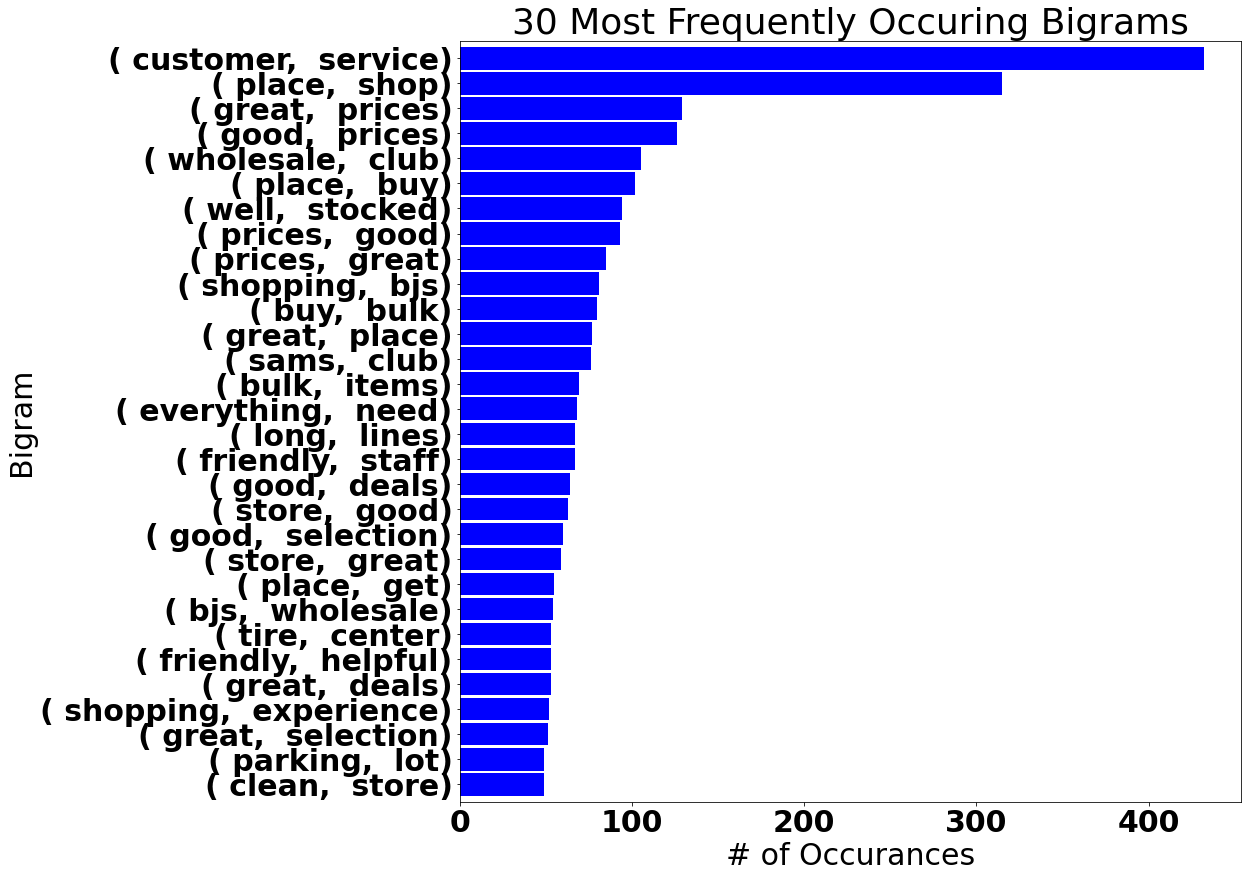

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(14, 14))
plt.title('30 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [11]:
trigrams_series =(pd.Series(nltk.ngrams(bj_r_text_review
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( place,  buy,  bulk)            28
( great,  place,  shop)          24
( customer,  service,  ever)     20
( clean,  well,  stocked)        18
( place,  shop,  good)           17
( big,  box,  store)             16
( bjs,  wholesale,  club)        16
( place,  shop,  bulk)           16
( great,  customer,  service)    15
( great,  prices,  great)        15
( selection,  good,  prices)     14
( selection,  great,  prices)    13
( place,  get,  bulk)            11
( prices,  good,  selection)     11
( good,  prices,  good)          11
( find,  im,  looking)           11
( place,  shop,  always)         10
( store,  great,  prices)        10
( store,  always,  clean)        10
( costco,  sams,  club)           9
( bjs,  great,  prices)           9
( love,  shopping,  bjs)          9
( big,  box,  stores)             9
( place,  shop,  great)           9
( worst,  customer,  service)     9
( everything,  need,  one)        9
( good,  place,  shop)            9
( get,  bulk,  items)       

Text(0.5, 0, '# of Occurances')

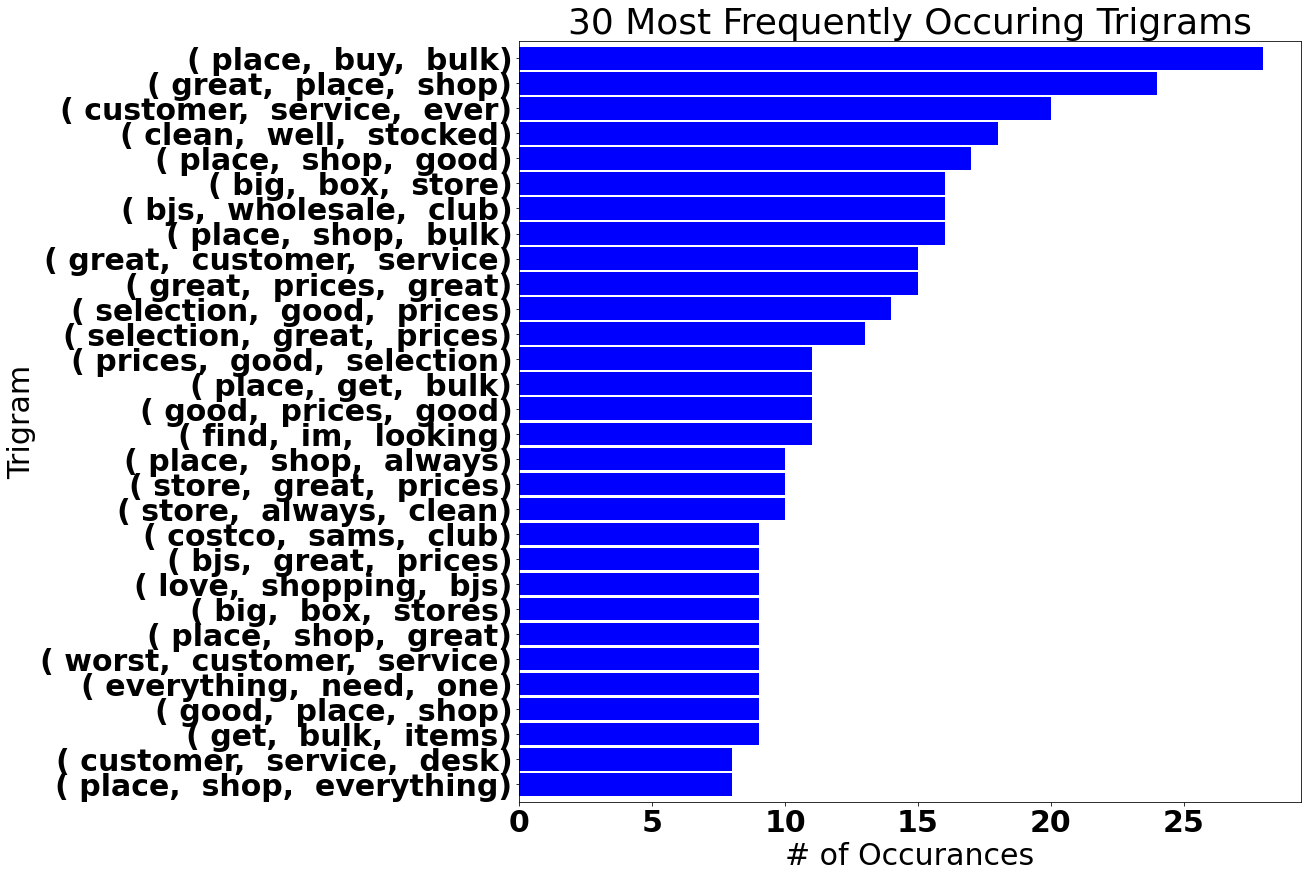

In [12]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(14, 14))
plt.title('30 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [13]:
fourgrams_series = (pd.Series(nltk.ngrams(bj_r_text_review
                       , 4)).value_counts())[:30]
fourgrams_series 

( place,  get,  bulk,  items)                8
( online,  ordered,  item,  supposed)        6
( began,  july,  ordered,  chromebook)       4
( place,  shop,  good,  prices)              4
( place,  buy,  bulk,  items)                4
( place,  buy,  things,  bulk)               4
( everything,  need,  one,  place)           4
( store,  wholesale,  purchase,  also)       3
( prefer,  bjs,  wholesale,  comparison)     3
( buy,  bulk,  great,  prices)               3
( store,  clean,  well,  stocked)            3
( bjs,  great,  prices,  great)              3
( best,  store,  wholesale,  purchase)       3
( place,  buy,  bulk,  great)                3
( first,  time,  last,  week)                3
( always,  find,  im,  looking)              3
( store,  ever,  long,  lines)               2
( cents,  per,  gallon,  gas)                2
( brady,  bunch,  family,  size)             2
( place,  shop,  found,  everything)         2
( like,  costco,  sams,  club)               2
( club,  alwa

Checking for words that appear in low star ratings

In [14]:
# words that are most commonly in low star ratings
# long lines 
# staff
# item 
# location
# customer service
branches = ['long lines','staff','item','location','customer service']

for branch in branches:
    bj_r_text_eng[branch] = bj_r_text_eng.astype(str).sum(axis=1).str.contains(branch)

In [15]:
onestarcomplains = bj_r_text_eng[bj_r_text_eng[branch] == True][bj_r_text_eng["star rating"] == 1]

#onestarcomplains = onestarcomplains.drop(["dif_lang","review_punct","topic_selection","topic_place","topic_lines","topic_parking","topic_stocked", "topic_clean","topic_location","topic_item","topic_staff","topic_deal","topic_price","topic_customer","topic_service","topic_shopping","review_tokenized","review_nonstop"], axis =1)


<ipython-input-15-9cd6b67facd4>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



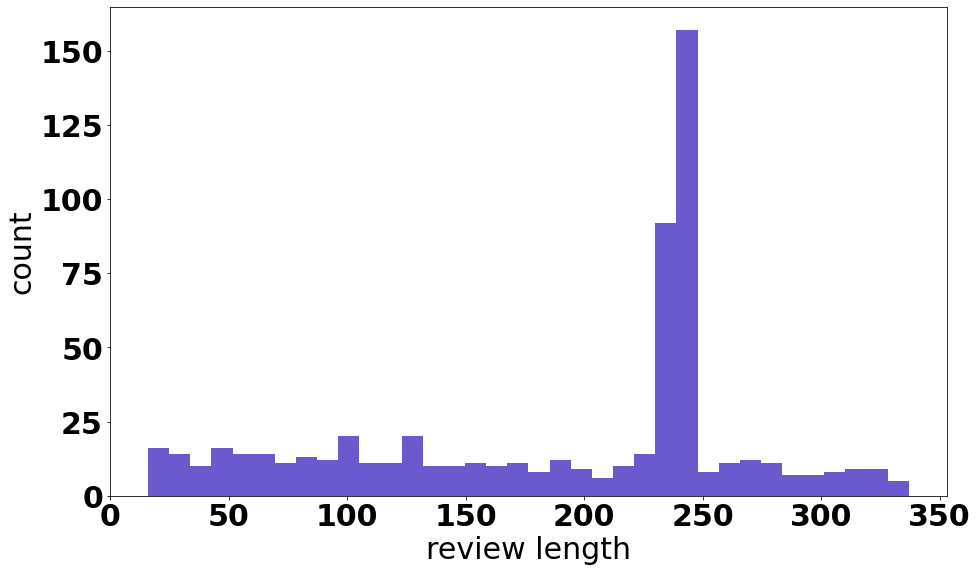

In [16]:
# this grapah shows that the one star reviews are on average 230-250 letters long
# people who give a lower star rating tend to write longer reviews
plt.figure(figsize= (15,9))
plt.hist(onestarcomplains['length'], bins= int(180/5), color = 'slateblue')


plt.xlabel('review length', fontsize= 30)
plt.ylabel('count', fontsize= 30)
plt.tick_params(axis='both', labelsize=30)

# Deeper Analysis

Checking distribution and n-grams for words that have an interesting distribution to see if they are connected to positive or negative reviews

Customer Service

Text(0, 0.5, 'Number Of Reviews')

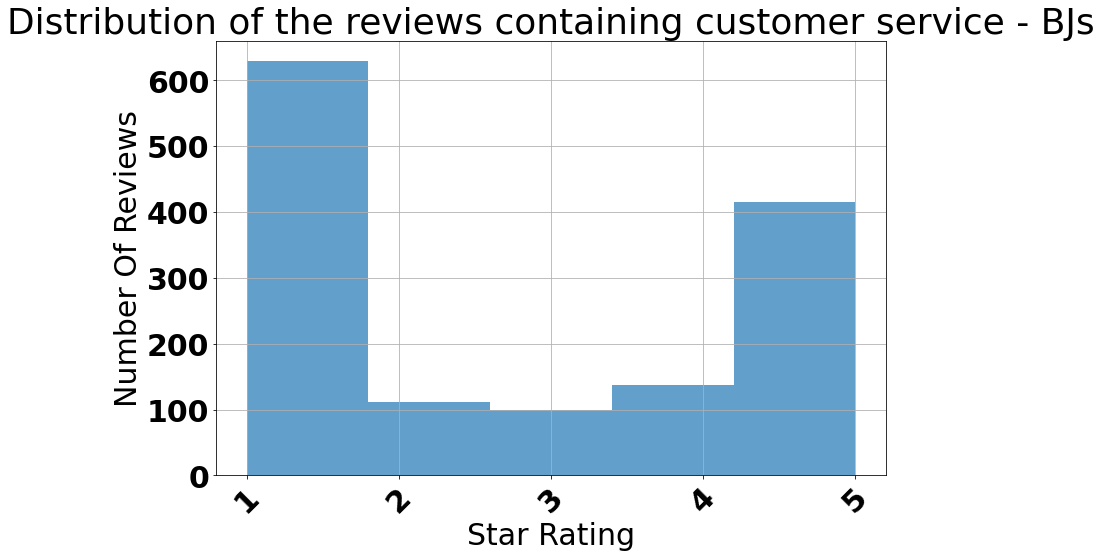

In [17]:
bj_r_text_eng['customer_service'] = bj_r_text_eng['review'].str.contains('customer service')
customer_service = bj_r_text_eng.loc[bj_r_text_eng['customer_service'] == True]
customer_service['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing customer service - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [18]:
customer_service2 = customer_service.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(customer_service2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( the,  customer,  service)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      174
( customer,  service,  desk)                                                                                                                                                                                                                                                                                                                                                                                                       

In [19]:
c = 21200
cs = len(customer_service)
cs1 = len(customer_service.loc[customer_service['star rating'] == 1])
cs5 = len(customer_service.loc[customer_service['star rating'] == 5])
print("Overall, reviews that mention customer service are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention customer service are 6.58 percent. Out of the 1394 reviews 45.12 percent are 1 star reviews and 29.84 percent are 5 star reviews.


Location

In [20]:
bj_r_text_eng['location'] = bj_r_text_eng['review'].str.contains('location')
location = bj_r_text_eng.loc[bj_r_text_eng['location'] == True]
location2 = location.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(location2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( at,  this,  location)             109
( to,  this,  location)              43
( this,  location,  is)              34
( this,  location,  has)             23
( customer,  service,  location)     23
( this,  location,  i)               22
( i,  have,  been)                   20
( the,  customer,  service)          18
( this,  location,  and)             17
( service,  at,  this)               15
( a,  lot,  of)                      13
( location,  has,  a)                13
( self,  check,  out)                13
( the,  location,  is)               13
( one,  of,  the)                    13
( they,  have,  a)                   12
( go,  to,  the)                     12
( this,  bjs,  location)             12
( the,  store,  is)                  11
( enough,  registers,  open)         11
( this,  location,  the)             11
( customer,  service,  at)           11
( the,  staff,  is)                  11
( location,  is,  the)               10
( place,  to,  shop)                 10


In [21]:
location.groupby("location_code").count().sort_values("star rating",ascending=False).head(10)

,star rating,name,review,date,dif_lang,year,length,review_punct,review_tokenized,review_nonstop,review_nonsense,long lines,staff,item,location,customer service,customer_service
location_code,,,,,,,,,,,,,,,,,
137,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
153,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
175,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
158,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
127,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
109,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
74,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
160,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
90,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [22]:
pd.set_option('display.max_colwidth', None)
location[location['location_code']==137][['star rating','review']].head(10)

,star rating,review
14245,4,"sometime during the pandemic, the layout of merch has changed locations. i walked in with a game plan and couldn't find things in there usual place. what did not change was electronics, bakery, produce, beauty, frozen food, and meat. i am …"
14249,5,"the store has changed. the items were but in different locations. however i found everything i needed. nice and clean, wide aisles and when going early you get in and out."
14250,1,waited on line for over an hr. no social distancing whatsoever. only one line for checkout line stretches around the store. this location is the worse that i’ve ever been to. strongly recommend your local supermarket
14251,1,this location has a rat infestation. it was my first time shopping at this location and it will definitely be my last. i saw mice and full size rats running back a forth between aisle.
14259,3,it's my back up location for my essential necessities. my go to has to be the old fedco location in the east pasadena store on colorado blvd.
14264,3,the only reason why i gave this location 3 stars is because the lack of shopping carts. the fact that you have to wait or follow another customer to get a cart is ridiculous. if the concern is stolen carts then do like target and put …
14298,1,good bargain but staff even managers are unconsiderit rude to disable people like myself even when on a wheelchair and the list could go on....horrible experience...i have access ride going to try another bjs location 😫😥 unbelievable!! smh
14300,5,this location is pretty decent as i've been to most of them for bronx & brooklyn. gotta give it up (madd props) to the cashiers that go body in getting it poppin. the lines can get pretty long depending on what time of day (always holidays) …
14302,1,"customer service is horrible and what the workers are doing is wrong!!!!! ""they lack honesty"" a star is not deserved . today i order a full size mattress at the exterior street location. i received the email to pickup. when i get there, …"
14311,3,"love bj's, because they have some awesome deals. this location is so frustrating. the lines are ridiculously long including the express line. some of the product variety sucks though. i rather go further to other locations then go here."


Text(0, 0.5, 'Number Of Reviews')

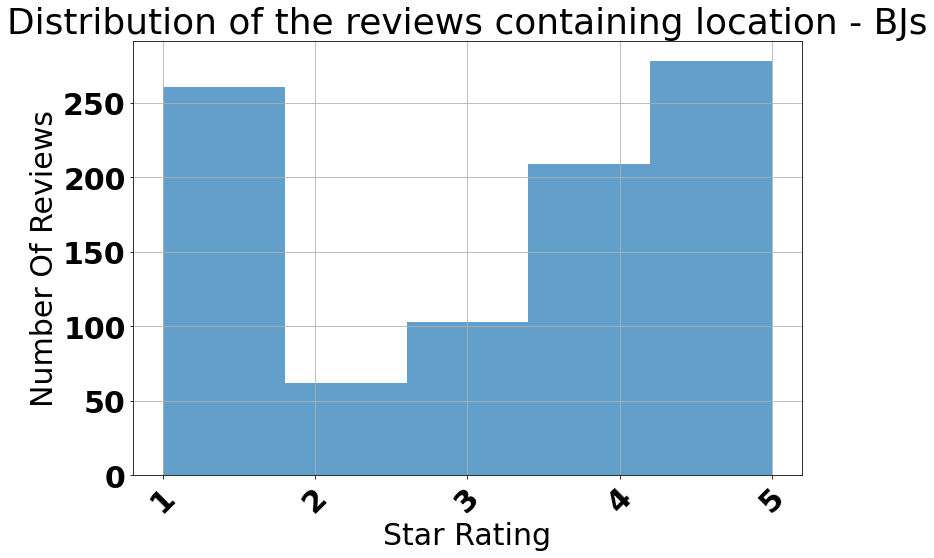

In [23]:
location['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing location - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [24]:
c = 21200
cs = len(location)
cs1 = len(location.loc[location['star rating'] == 1])
cs5 = len(location.loc[location['star rating'] == 5])
print("Overall, reviews that mention location are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention location are 4.31 percent. Out of the 913 reviews 28.59 percent are 1 star reviews and 30.45 percent are 5 star reviews.


Lines

In [25]:
bj_r_text_eng['long_lines'] = bj_r_text_eng['review'].str.contains('lines')
long_lines = bj_r_text_eng.loc[bj_r_text_eng['long_lines'] == True]
long_lines2 = long_lines.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(long_lines2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( the,  lines,  are)            66
( self,  checkout,  lines)      35
( check,  out,  lines)          34
( self,  check,  out)           33
( self,  check,  lines)         23
( and,  the,  lines)            23
( lines,  are,  long)           20
( lines,  are,  always)         19
( long,  checkout,  lines)      19
( to,  check,  out)             19
( long,  lines,  and)           18
( always,  long,  lines)        17
( of,  the,  store)             17
( the,  lines,  were)           16
( long,  lines,  at)            16
( lines,  can,  be)             16
( extremely,  long,  lines)     15
( lines,  move,  pretty)        15
( lines,  at,  the)             14
( but,  the,  lines)            14
( most,  of,  the)              14
( are,  always,  long)          13
( out,  lines,  are)            13
( you,  have,  to)              13
( the,  store,  is)             12
( enough,  lines,  open)        12
( customer,  service,  desk)    12
( the,  long,  lines)           12
( move,  pretty,  qu

In [26]:
fourgrams_series = (pd.Series(nltk.ngrams(long_lines2
                       , 4)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
fourgrams_series

( self,  check,  out,  lines)           11
( the,  back,  of,  the)                10
( the,  self,  check,  out)             10
( lines,  are,  always,  long)           9
( check,  out,  lines,  are)             9
( and,  the,  lines,  are)               9
( lines,  move,  pretty,  quickly)       9
( the,  check,  out,  lines)             9
( to,  the,  back,  of)                  8
( the,  lines,  are,  long)              8
( but,  the,  lines,  are)               8
( the,  lines,  can,  be)                7
( never,  enough,  lines,  open)         7
( all,  the,  way,  to)                  6
( back,  of,  the,  store)               6
( lines,  are,  ridiculously,  long)     6
( the,  checkout,  lines,  are)          6
( lines,  are,  long,  and)              6
( well,  stocked,  lines,  move)         6
( stocked,  lines,  move,  pretty)       6
( most,  of,  the,  time)                5
( the,  lines,  are,  very)              5
( lines,  can,  be,  long)               5
( lines,  a

In [27]:
fivegrams_series = (pd.Series(nltk.ngrams(long_lines2
                       , 5)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
fivegrams_series

( to,  the,  back,  of,  the)                            8
( stocked,  lines,  move,  pretty,  quickly)             6
( the,  self,  check,  out,  lines)                      6
( the,  back,  of,  the,  store)                         6
( well,  stocked,  lines,  move,  pretty)                6
( the,  check,  out,  lines,  are)                       6
( the,  lines,  are,  ridiculously,  long)               4
( lines,  are,  long,  and,  the)                        4
( the,  way,  to,  the,  back)                           4
( office,  paper,  electronics,  kitchen,  household)    4
( all,  the,  way,  to,  the)                            4
( direct,  shoppersno,  staff,  anywhere,  actually)     3
( coo,  selection,  checkout,  needs,  work)             3
( slower,  prices,  slightly,  higher,  trash)           3
( prepared,  foods,  shouldnt,  charge,  membership)     3
( choices,  free,  parking,  however,  often)            3
( hard,  finding,  thingshelp,  long,  lines)           

Text(0, 0.5, 'Number Of Reviews')

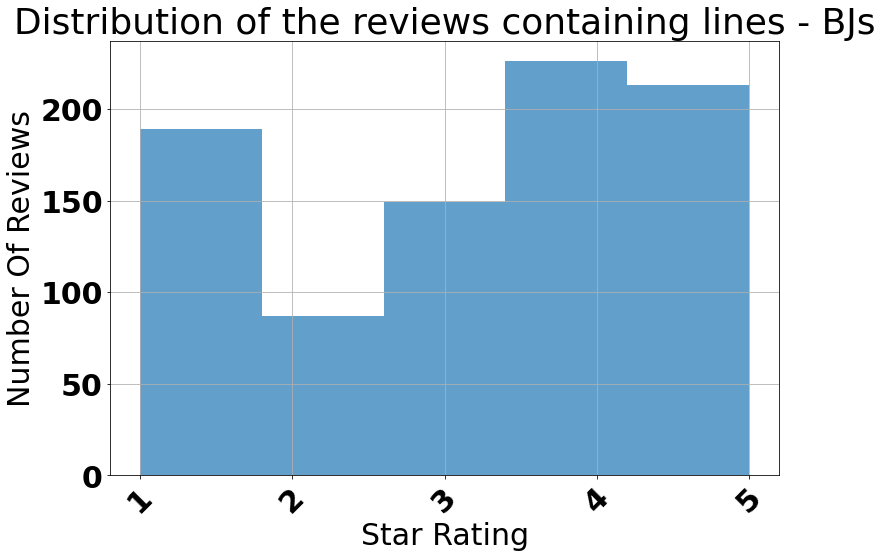

In [28]:
long_lines['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing lines - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [29]:
cs = len(long_lines)
cs1 = len(long_lines.loc[long_lines['star rating'] == 1])
cs5 = len(long_lines.loc[long_lines['star rating'] == 5])
print("Overall, reviews that mention long_lines are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention long_lines are 4.08 percent. Out of the 864 reviews 21.88 percent are 1 star reviews and 24.65 percent are 5 star reviews.


Sam's Club

In [30]:
bj_r_text_eng['samsclub'] = bj_r_text_eng['review'].str.contains('sams club')
samsclub = bj_r_text_eng.loc[bj_r_text_eng['samsclub'] == True]
samsclub2 = samsclub.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(samsclub2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( costco,  sams,  club)             14
( than,  sams,  club)                6
( sams,  club,  cosco)               6
( at,  sams,  club)                  6
( horrible,  customer,  service)     6
( better,  sams,  club)              6
( sams,  club,  next)                5
( sams,  club,  and)                 5
( or,  sams,  club)                  4
( costco,  or,  sams)                4
( sams,  club,  bjs)                 4
( sams,  club,  prices)              4
( sams,  club,  closed)              4
( a,  sams,  club)                   4
( selection,  sams,  club)           4
( sams,  club,  good)                4
( long,  lines,  never)              3
( miss,  sams,  club)                3
( average,  consumer,  versus)       3
( updated,  horrible,  customer)     3
( sams,  club,  membership)          3
( service,  training,  often)        3
( dept,  rep,  gave)                 3
( fan,  miss,  sams)                 3
( club,  however,  costco)           3
( f,  checked,  us)      

Text(0, 0.5, 'Number Of Reviews')

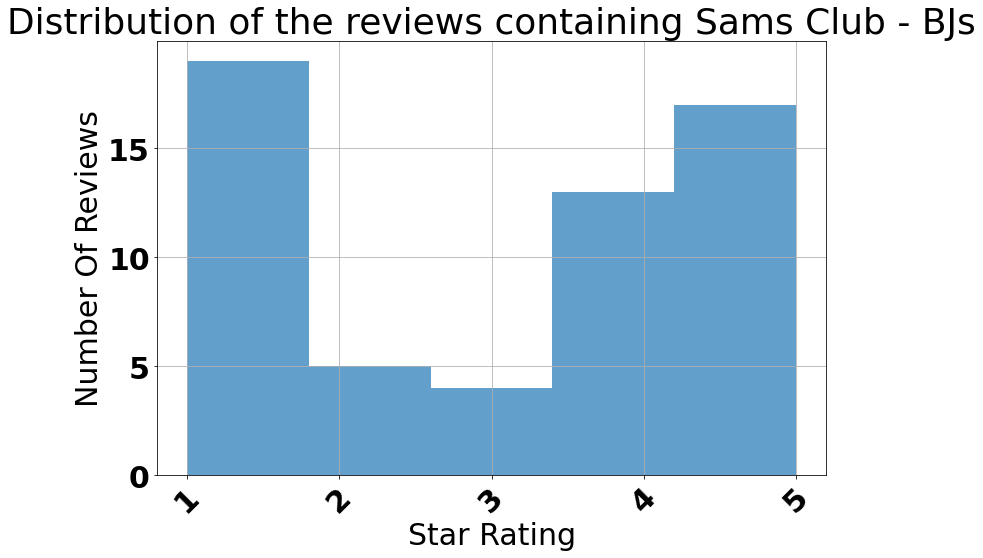

In [31]:
samsclub['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing Sams Club - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [32]:
cs = len(samsclub)
cs1 = len(samsclub.loc[samsclub['star rating'] == 1])
cs5 = len(samsclub.loc[samsclub['star rating'] == 5])
print("Overall, reviews that mention Sam's Club are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention Sam's Club are 0.27 percent. Out of the 58 reviews 32.76 percent are 1 star reviews and 29.31 percent are 5 star reviews.


Costco

In [33]:
bj_r_text_eng['costco'] = bj_r_text_eng['review'].str.contains('costco')
costco = bj_r_text_eng.loc[bj_r_text_eng['costco'] == True]
costco2 = costco.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(costco2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( sams,  club,  costco)             49
( costco,  sams,  club)             49
( compared,  to,  costco)           23
( costco,  and,  sams)              22
( club,  and,  costco)              21
( costco,  or,  sams)               20
( better,  than,  costco)           20
( they,  have,  a)                  19
( sams,  club,  and)                19
( than,  costco,  and)              18
( go,  to,  costco)                 18
( the,  prices,  are)               15
( as,  good,  as)                   14
( to,  costco,  and)                14
( sams,  and,  costco)              12
( sams,  or,  costco)               12
( better,  customer,  service)      12
( or,  sams,  club)                 12
( as,  costco,  but)                11
( the,  store,  is)                 11
( a,  lot,  of)                     11
( a,  costco,  membership)          11
( costco,  much,  better)           11
( much,  better,  than)             10
( you,  have,  to)                  10
( customer,  service,  is

Text(0, 0.5, 'Number Of Reviews')

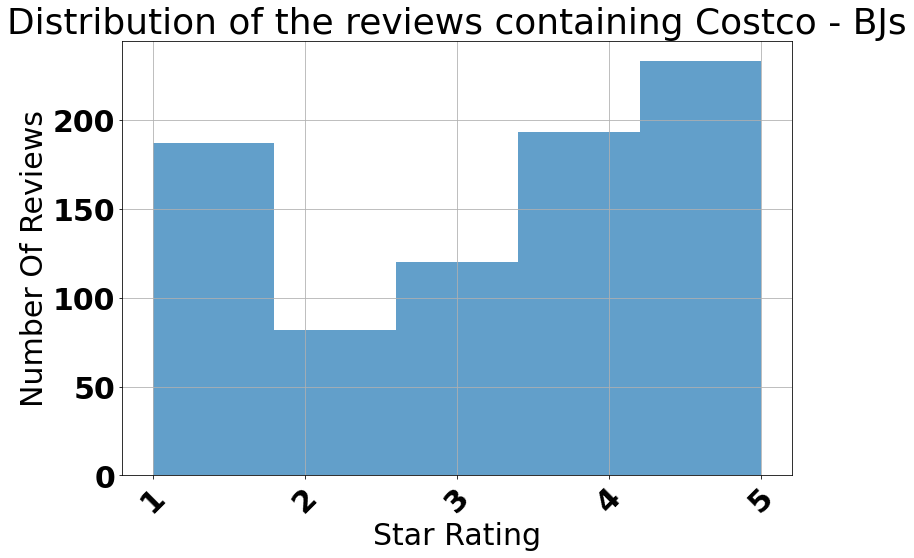

In [34]:
costco['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing Costco - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [35]:
cs = len(costco)
cs1 = len(costco.loc[costco['star rating'] == 1])
cs5 = len(costco.loc[costco['star rating'] == 5])
print("Overall, reviews that mention Costco are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention Costco are 3.84 percent. Out of the 815 reviews 22.94 percent are 1 star reviews and 28.59 percent are 5 star reviews.


Walmart

In [36]:
bj_r_text_eng['walmart'] = bj_r_text_eng['review'].str.contains('walmart')
walmart = bj_r_text_eng.loc[bj_r_text_eng['walmart'] == True]
walmart2 = walmart.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(walmart2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( walmart,  next,  door)                    9
( cheaper,  than,  walmart)                 5
( go,  to,  walmart)                        5
( than,  walmart,  and)                     5
( to,  walmart,  and)                       4
( walmart,  much,  better)                  4
( sorely,  disappointed,  also)             3
( inventory,  rotisserie,  chicken)         3
( much,  smaller,  prices)                  3
( recurring,  renewal,  even)               3
( unlike,  amazon,  walmart)                3
( help,  customers,  got)                   3
( stocked,  walmart,  target)               3
( cant,  even,  begin)                      3
( warehouseunorganized,  shelves,  poor)    3
( ripoffs,  imo,  give)                     3
( in,  the,  bakery)                        3
( products,  well,  past)                   3
( member,  ship,  price)                    3
( booth,  phones,  ringing)                 3
( later,  unlike,  amazon)                  3
( service,  center,  stated)      

Text(0, 0.5, 'Number Of Reviews')

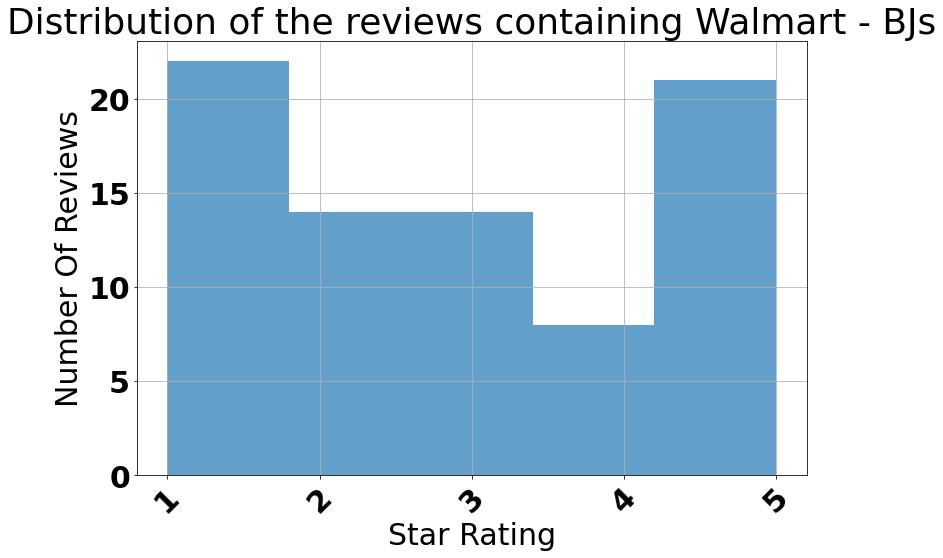

In [37]:
walmart['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing Walmart - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [38]:
cs = len(walmart)
cs1 = len(walmart.loc[walmart['star rating'] == 1])
cs5 = len(walmart.loc[walmart['star rating'] == 5])

print("Overall, reviews that mention Walmart are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." %  (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention Walmart are 0.37 percent. Out of the 79 reviews 27.85 percent are 1 star reviews and 26.58 percent are 5 star reviews.


Parking

In [39]:
bj_r_text_eng['parking'] = bj_r_text_eng['review'].str.contains('parking')
parking = bj_r_text_eng.loc[bj_r_text_eng['parking'] == True]
parking2 = parking.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(parking2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( the,  parking,  lot)           106
( in,  the,  parking)             52
( parking,  lot,  is)             37
( plenty,  of,  parking)          31
( the,  store,  is)               17
( parking,  lot,  and)            17
( you,  have,  to)                14
( a,  lot,  of)                   13
( big,  parking,  lot)            12
( lot,  is,  a)                   11
( place,  to,  shop)              11
( store,  parking,  lot)          10
( and,  plenty,  of)              10
( clean,  well,  stocked)         10
( easy,  find,  parking)           9
( of,  parking,  and)              9
( long,  checkout,  lines)         9
( of,  the,  parking)              9
( large,  parking,  lot)           8
( you,  need,  to)                 8
( friendly,  helpful,  staff)      8
( easy,  to,  find)                8
( huge,  parking,  lot)            8
( parking,  long,  lines)          7
( as,  well,  as)                  7
( go,  to,  the)                   7
( a,  great,  place)               7
(

Text(0, 0.5, 'Number Of Reviews')

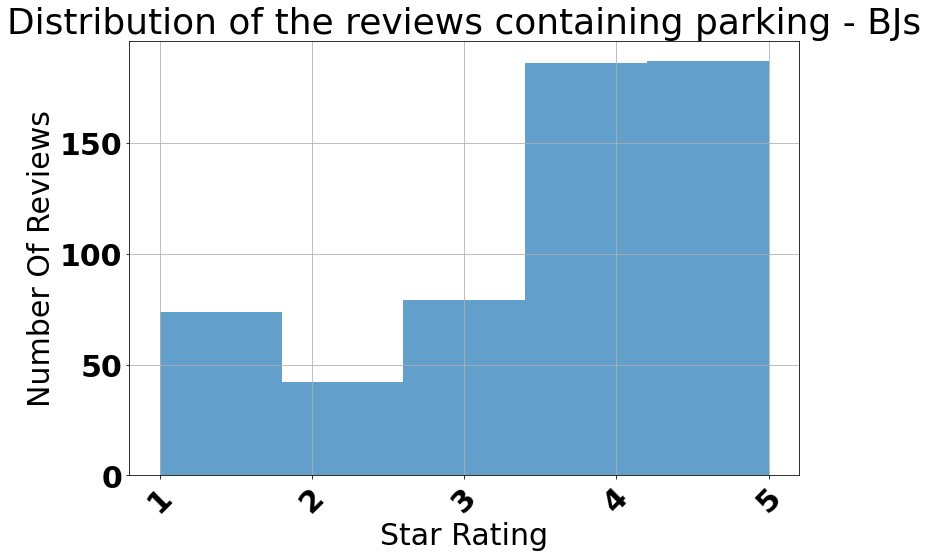

In [40]:
parking['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing parking - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [41]:
cs = len(parking)
cs1 = len(parking.loc[parking['star rating'] == 1])
cs5 = len(parking.loc[parking['star rating'] == 5])
print("Overall, reviews that mention parking are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention parking are 2.68 percent. Out of the 568 reviews 13.03 percent are 1 star reviews and 32.92 percent are 5 star reviews.


Tire Center

In [42]:
bj_r_text_eng['tirecenter'] = bj_r_text_eng['review'].str.contains('tire center')
tirecenter = bj_r_text_eng.loc[bj_r_text_eng['tirecenter'] == True]
tirecenter2 = tirecenter.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(tirecenter2
                       , 3)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( the,  tire,  center)           61
( at,  the,  tire)               15
( tire,  center,  is)            12
( to,  the,  tire)               11
( service,  tire,  center)       11
( in,  the,  tire)               10
( tire,  center,  and)            9
( a,  tire,  center)              8
( tire,  center,  worst)          7
( i,  had,  to)                   7
( tires,  tire,  center)          7
( tire,  center,  to)             7
( worst,  customer,  service)     7
( propane,  tire,  center)        6
( one,  of,  the)                 6
( from,  the,  tire)              6
( center,  every,  time)          6
( staff,  tire,  center)          6
( brand,  new,  tires)            6
( center,  stay,  away)           6
( would,  highly,  recommend)     6
( an,  appointment,  for)         6
( tire,  center,  propane)        6
( i,  had,  a)                    5
( tire,  center,  saved)          5
( tire,  center,  bjs)            5
( even,  bother,  trying)         5
( a,  flat,  tire)          

In [43]:
trigrams_series = (pd.Series(nltk.ngrams(tirecenter2
                       , 5)).value_counts())[:30]
# n-grams 3
# under the top 30 it says worst customer service
trigrams_series

( clothing,  outdoor,  furniture,  seasonal,  items)              3
( solution,  additionally,  ryan,  operational,  manager)         3
( u,  budget,  mins,  upon,  arrival)                             3
( staff,  worst,  tire,  experience,  ever)                       3
( couple,  day,  thats,  lazy,  business)                         3
( hard,  way,  bought,  new,  tires)                              3
( times,  tire,  center,  poorly,  managed)                       3
( rotation,  road,  hazard,  doesnt,  cover)                      3
( expected,  day,  delivery,  time,  set)                         3
( tire,  rotation,  purchasing,  tires,  etc)                     3
( needed,  tire,  doesent,  take,  long)                          3
( next,  couple,  day,  thats,  lazy)                             3
( website,  states,  tire,  center,  hours)                       3
( wasnt,  even,  started,  yet,  mostly)                          3
( pm,  asked,  customer,  service,  rep)        

Text(0, 0.5, 'Number Of Reviews')

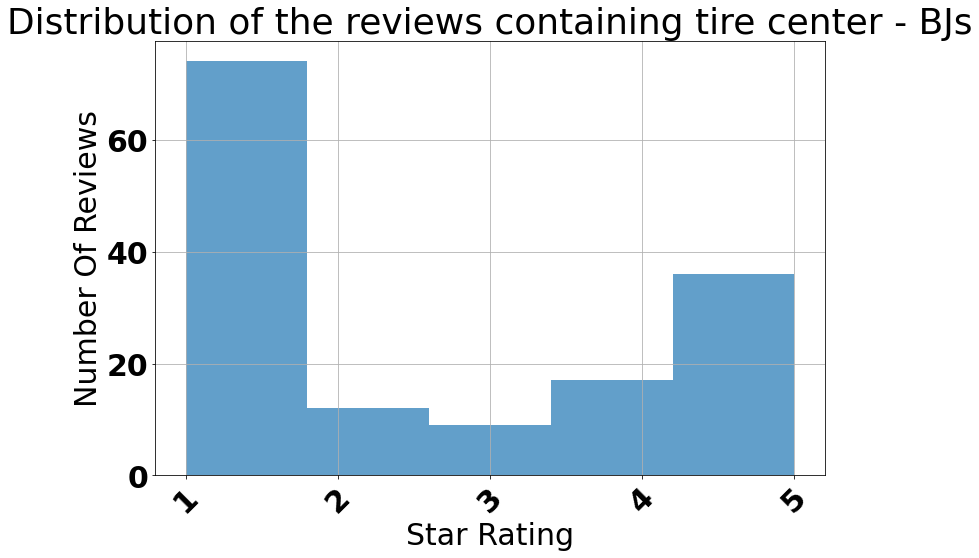

In [44]:
tirecenter['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing tire center - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [45]:
cs = len(tirecenter)
cs1 = len(tirecenter.loc[tirecenter['star rating'] == 1])
cs5 = len(tirecenter.loc[tirecenter['star rating'] == 5])
print("Overall, reviews that mention parking are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention parking are 0.7 percent. Out of the 148 reviews 50.0 percent are 1 star reviews and 24.32 percent are 5 star reviews.


Staff

In [46]:
bj_r_text_eng['staff'] = bj_r_text_eng['review'].str.contains('staff')
staff = bj_r_text_eng.loc[bj_r_text_eng['staff'] == True]
staff2 = staff.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(staff2
                       , 3)).value_counts())[:30]
# n-grams 3
trigrams_series

( the,  staff,  is)              115
( and,  the,  staff)              72
( staff,  is,  very)              49
( friendly,  and,  helpful)       48
( the,  staff,  are)              47
( staff,  is,  friendly)          39
( staff,  is,  always)            37
( friendly,  helpful,  staff)     35
( of,  the,  staff)               35
( staff,  friendly,  helpful)     34
( the,  store,  is)               32
( is,  friendly,  and)            29
( place,  to,  shop)              28
( customer,  service,  staff)     27
( and,  friendly,  staff)         26
( clean,  well,  stocked)         23
( very,  friendly,  and)          21
( staff,  is,  helpful)           21
( and,  helpful,  staff)          21
( the,  staff,  was)              21
( friendly,  staff,  and)         20
( friendly,  staff,  great)       20
( well,  stocked,  staff)         20
( prices,  friendly,  staff)      20
( is,  clean,  and)               19
( they,  have,  a)                19
( staff,  clean,  store)          18
(

Text(0, 0.5, 'Number Of Reviews')

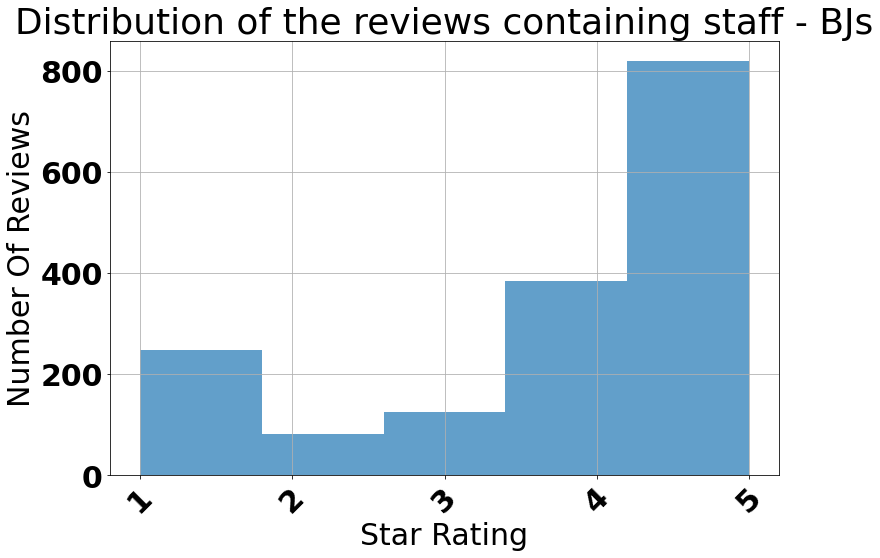

In [47]:
staff['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing staff - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [48]:
cs = len(staff)
cs1 = len(staff.loc[staff['star rating'] == 1])
cs5 = len(staff.loc[staff['star rating'] == 5])
print("Overall, reviews that mention staff are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews." % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2)))

Overall, reviews that mention staff are 7.82 percent. Out of the 1658 reviews 14.96 percent are 1 star reviews and 49.4 percent are 5 star reviews.


Item

In [49]:
bj_r_text_eng['item'] = bj_r_text_eng['review'].str.contains('item')
item = bj_r_text_eng.loc[bj_r_text_eng['item'] == True]
item2 = item.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(item2
                       , 3)).value_counts())[:30]
# n-grams 3
trigrams_series

( a,  lot,  of)                  57
( a,  few,  items)               36
( variety,  of,  items)          36
( of,  the,  items)              35
( place,  to,  shop)             30
( you,  have,  to)               30
( out,  of,  stock)              29
( the,  items,  i)               28
( as,  well,  as)                28
( they,  have,  a)               28
( the,  customer,  service)      26
( selection,  of,  items)        25
( of,  items,  and)              24
( to,  pick,  up)                24
( customer,  service,  desk)     23
( items,  that,  i)              23
( the,  prices,  are)            22
( great,  place,  to)            21
( on,  bulk,  items)             21
( most,  of,  the)               21
( in,  the,  store)              21
( the,  store,  is)              20
( self,  check,  out)            20
( get,  bulk,  items)            20
( an,  item,  that)              19
( i,  went,  to)                 19
( some,  of,  the)               18
( items,  that,  are)       

Text(0, 0.5, 'Number Of Reviews')

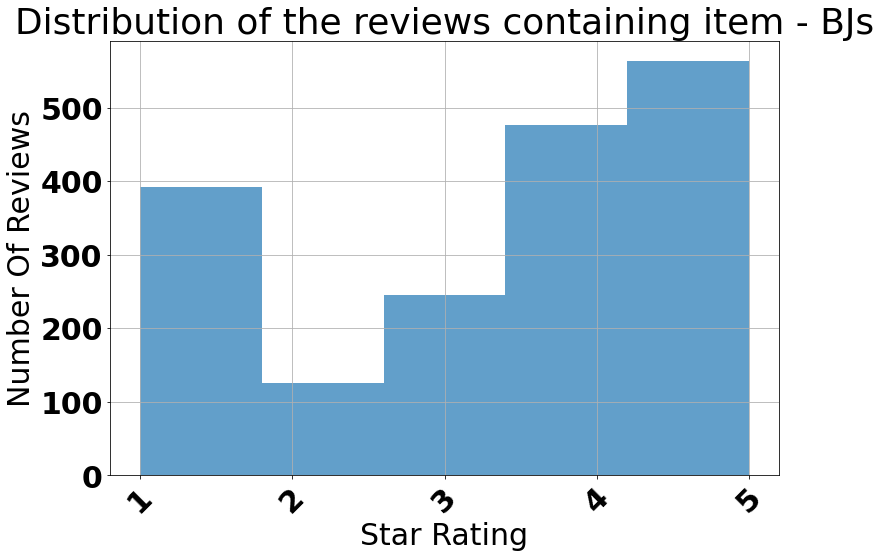

In [50]:
item['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing item - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [51]:
cs = len(item)
cs1 = len(item.loc[item['star rating'] == 1])
cs4 = len(item.loc[item['star rating'] == 4])
cs5 = len(item.loc[item['star rating'] == 5])
print("Overall, reviews that mention item are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews. %s" % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2),round(cs4/cs*100,2)))

Overall, reviews that mention item are 8.5 percent. Out of the 1802 reviews 21.75 percent are 1 star reviews and 31.24 percent are 5 star reviews. 26.47


Place

In [52]:
bj_r_text_eng['place'] = bj_r_text_eng['review'].str.contains('place')
place = bj_r_text_eng.loc[bj_r_text_eng['place'] == True]
place2 = place.to_string().split(",")
trigrams_series = (pd.Series(nltk.ngrams(place2
                       , 3)).value_counts())[:30]
# n-grams 3
trigrams_series

( place,  to,  shop)                                                                                                                                                                                                                                                                             350
( great,  place,  to)                                                                                                                                                                                                                                                                            138
( place,  to,  buy)                                                                                                                                                                                                                                                                              108
( a,  great,  place)                                                                                                     

Text(0, 0.5, 'Number Of Reviews')

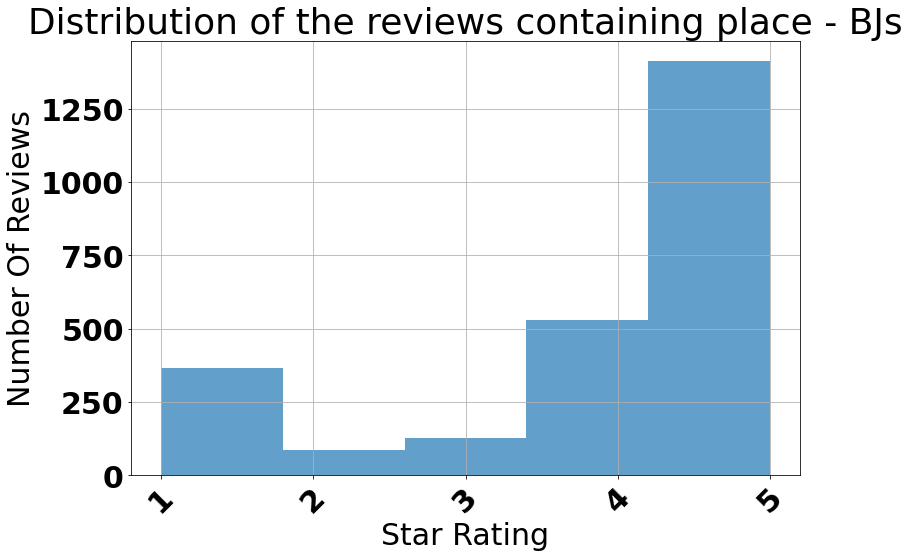

In [53]:
place['star rating'].plot(kind='hist',
           alpha=0.7,
           bins=5,
           title='Distribution of the reviews containing place - BJs',
           rot=45,
           grid=True,
           figsize=(12,8))
plt.xlabel('Star Rating')
plt.ylabel("Number Of Reviews")

In [54]:
cs = len(place)
cs1 = len(place.loc[place['star rating'] == 1])
cs4 = len(item.loc[item['star rating'] == 4])
cs5 = len(item.loc[item['star rating'] == 5])
print("Overall, reviews that mention item are %s percent. Out of the %s reviews %s percent are 1 star reviews and %s percent are 5 star reviews. %s" % (round(cs/c*100,2), cs, round(cs1/cs*100,2), round(cs5/cs*100,2),round(cs4/cs*100,2)))

Overall, reviews that mention item are 11.9 percent. Out of the 2523 reviews 14.47 percent are 1 star reviews and 22.31 percent are 5 star reviews. 18.91
